# SDG 확률적 경사하강법
Stochastic Gradient Descent
- 함수의 **기울기(gradient)**를 따라 내려가며 **가장 낮은 지점(=손실 최소값)**을 찾음.
- 함수의 **최솟값**을 찾기 위해 **가중치**를 조금씩 수정해 나감
- 확률적(Stochastic) : 데이터를 하나씩(random하게) 보고 바로 업데이트 → 빠르고 가볍지만 약간의 ‘노이즈’ 존재

```
모델의 오차(비용)을 최소화하는 파라미터(가중치)를 찾기위한 최적화 방법
```

현재 위치: 모델의 현재 파라미터 <br>
산의 높이: 모델의 오차 <br>
기울기: 반대방향으로 가야 가장 빠르게 낮아짐 <br>

---

`배치 경사하강법`: 산 전체의 지형을 모두 조사해 가장 가파른 방향을 찾음 -> 한 걸음씩 내려가는 구조 (한 번에 전체 데이터 다 이용)
- 장: 기울기 계산이 매우 정확
- 단: 데이터가 많으면 계산 속도 매우 느림, 리소스 많이 사용
`확률적 경사하강법`: 무작위로 한 지점만 보고 그곳의 경사를 따라서 내려감
- 무작위로 샘플 한 개의 오차 계산 -> 파라미터 업데이트 -> 모든 데이터에 대해 빠르게 반복
- 장: 지역최저점(local minimum)에 갇히지 않고, 더 낮은 **전역최저점(global minimun)**

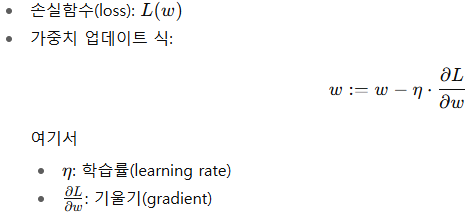 <br>
`n(에타)`: 학습률이 너무 크면 최적점을 지나고, 너무 작으면 학습이 매우 느림 <br>
`나블라`: 기울기 Gradient <br>
`J`: 오차함수(비용함수), 현재 가중치(w-old)에서 하나의 데이터 샘플에 대한 오차 <br>

새로운 가중치 = 현재 가중치 오차를 키우는 기울기 방향과 반대로 학습률만큼 이동한 값

- y = Wx
- 비용함수 오차 (Wx-y)**2 / 2 -> 미분 -> (Wx-y)*x

예시
- 공부시간x, 시험점수y 
- (3,7) w-old = 1.0, 학습률 n=0.1
- y_pred = 1.0*3
- 기울기 계산 (3.0-7)*3 = -12.0
- 1.0 - (0.2*-12.0) = 1.0+1.2 = 2.2



- 손실함수 Loss function: 한 개 데이터에 대한 오차
- 비용함수 Cost function: 전체 데이터에 대한 평균 오차

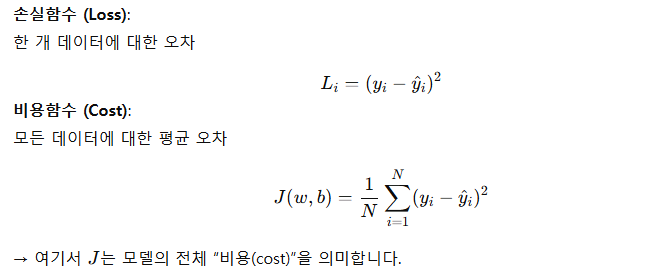

##### learning rate 학습률
: 딥러닝 모델의 가중치(매개변수)를 업데이트하는 크기를 결정하는 하이퍼파라미터
##### epoch
: 몇 번 학습

epoch: 1, loss: 1.1301, w: 1.2954, b: 1.3359
epoch: 2, loss: 0.9558, w: 1.7513, b: 1.1860
epoch: 3, loss: 0.9735, w: 1.8109, b: 0.9947
epoch: 4, loss: 1.0660, w: 1.7449, b: 0.8675
epoch: 5, loss: 0.9581, w: 1.9272, b: 1.1008
epoch: 6, loss: 0.9696, w: 1.8066, b: 1.0134
epoch: 7, loss: 1.0334, w: 1.6025, b: 1.0838
epoch: 8, loss: 0.9917, w: 1.6821, b: 1.0844
epoch: 9, loss: 0.9548, w: 1.9142, b: 1.0025
epoch: 10, loss: 0.9712, w: 1.7872, b: 1.0280


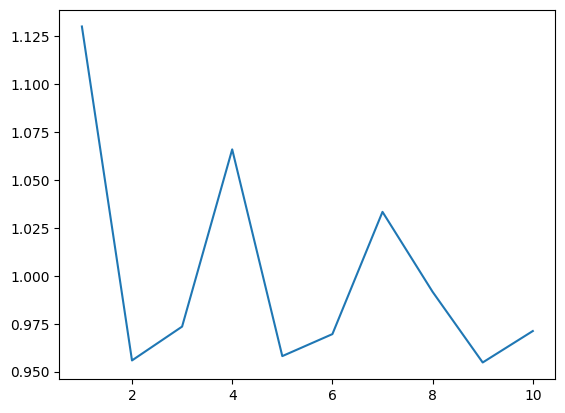

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플데이터 y=2x+1
x = 2*np.random.rand(100,1)
y = 2*x + 1 + np.random.randn(100,1) #노이즈

# SDG를 위한 초기값 세팅
w = np.random.randn(1,1) #가중치(기울기)
b = np.random.randn(1,1) #y 절편
learning_rate = 0.05
n_epochs = 10
history = [] #학습현황 기록
loss = []

# 반복 학습
for epoch in range(n_epochs):
    #epoch마다 데이터 샘플 하나씩 학습
    for i in range(len(x)):
        random_idx = np.random.randint(len(x))
        xi = x[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        # 예측 y-pred = Wx+b
        y_pred = xi.dot(w)+b

        # 오차 계산
        error = y_pred - yi

        # 수식 적용: 기울기 계산
        gradient_w = xi.T.dot(error)
        gradinet_b = np.sum(error)

        # 수식 적용: 가중치와 편향 업데이트
        w = w - learning_rate*gradient_w
        b = b - learning_rate*gradinet_b
        history.append((w.copy()[0,0], b.copy()[0,0])) #시각화를 위해 저장

    # epoch 단위로 결과 출력
    total_loss = np.mean( (x.dot(w) + b - y)**2)
    loss.append(total_loss)
    print(f'epoch: {epoch+1}, loss: {total_loss:.4f}, w: {w[0,0]:.4f}, b: {b[0,0]:.4f}')


plt.plot(range(1,n_epochs+1),loss )

In [12]:
# SGD
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()

sgd.fit(x,y)

C:\Users\choi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [20]:
sgd.predict(x)[:5], sgd.intercept_, sgd.coef_

(array([4.35604412, 2.39564713, 1.46783902, 3.69465321, 1.9552231 ]),
 array([1.27192872]),
 array([1.6920831]))

In [18]:
w, b
predict = w*x + b
predict[:5]

array([[4.28540374],
       [2.21483059],
       [1.23487879],
       [3.58684204],
       [1.74965432]])

In [21]:
# %pip install Pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
